<h1>Import CSV</h1>

In [2]:
import pandas as pd 
df=pd.read_csv("manufacturing_defect_detection_dataset.csv")
df

,Temperature,Pressure,Humidity,Machine_Speed,Production_Time,Shift,Operator_Experience_Years,Material_Type,Defect
0,79.97,26.61,48.48,1297,8,Day,5,Aluminum,0
1,73.62,28.47,47.83,1271,2,Evening,6,Aluminum,0
2,81.48,27.01,35.63,1463,3,Evening,8,Plastic,1
3,90.23,30.55,50.80,1107,7,Evening,8,Aluminum,1
4,72.66,35.99,30.10,1258,10,Day,3,Steel,0
...,...,...,...,...,...,...,...,...,...
9995,88.01,31.94,39.23,1468,2,Evening,12,Plastic,1
9996,55.02,36.89,59.45,1572,11,Day,13,Aluminum,1
9997,67.95,31.89,39.99,1350,4,Evening,9,Aluminum,0
9998,79.96,38.57,26.08,1136,10,Evening,4,Aluminum,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                10000 non-null  float64
 1   Pressure                   10000 non-null  float64
 2   Humidity                   10000 non-null  float64
 3   Machine_Speed              10000 non-null  int64  
 4   Production_Time            10000 non-null  int64  
 5   Shift                      10000 non-null  object 
 6   Operator_Experience_Years  10000 non-null  int64  
 7   Material_Type              10000 non-null  object 
 8   Defect                     10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


DATA CLEANING

In [4]:
df.isnull().sum()

Temperature                  0
Pressure                     0
Humidity                     0
Machine_Speed                0
Production_Time              0
Shift                        0
Operator_Experience_Years    0
Material_Type                0
Defect                       0
dtype: int64

<h1>DUPLICATE VALUE</h1>


In [5]:
df.drop_duplicates(inplace=True)

<h1>CHECKED OUTLIERS</h1>

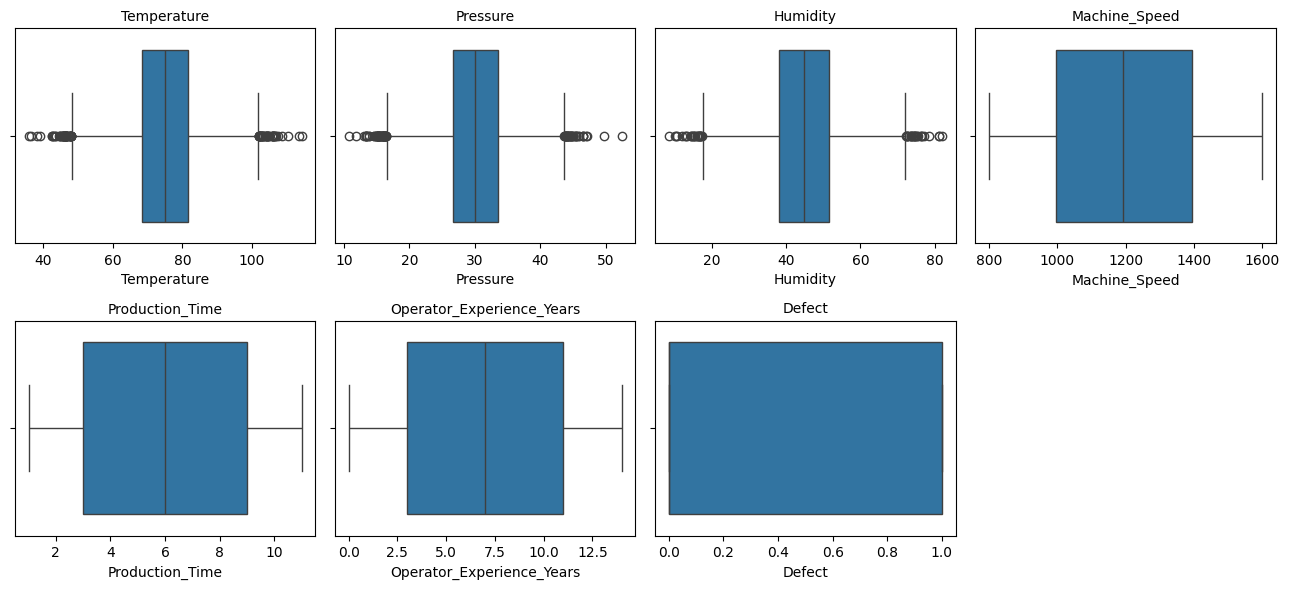

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4 
n_rows = math.ceil(len(numeric_col) / n_cols)
plt.figure(figsize=(13, 3 * n_rows))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.show()


<h1>DATA TYPE</h1>

In [25]:
df.dtypes

Temperature                  float64
Pressure                     float64
Humidity                     float64
Machine_Speed                  int64
Production_Time                int64
Shift                         object
Operator_Experience_Years      int64
Material_Type                 object
Defect                         int64
dtype: object

<h1>EDA</h1>

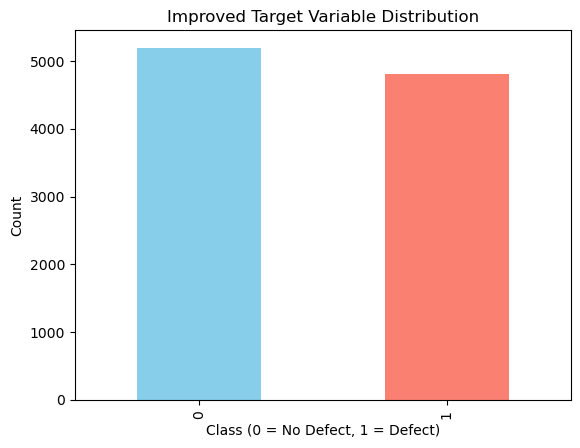

In [26]:
target = df.columns[-1]
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure()
df[target].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.xlabel("Class (0 = No Defect, 1 = Defect)")
plt.ylabel("Count")
plt.title("Improved Target Variable Distribution")
plt.show()


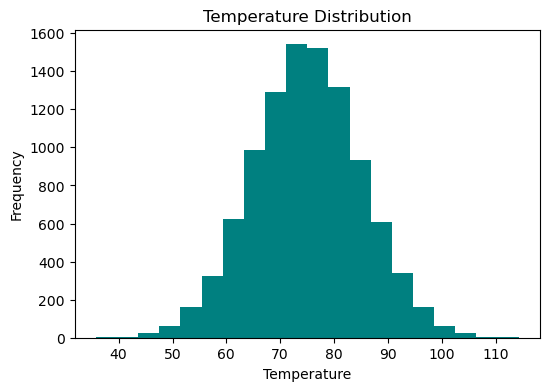

In [27]:
plt.figure(figsize=(6,4))
plt.hist(df['Temperature'], bins=20,color='Teal')
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


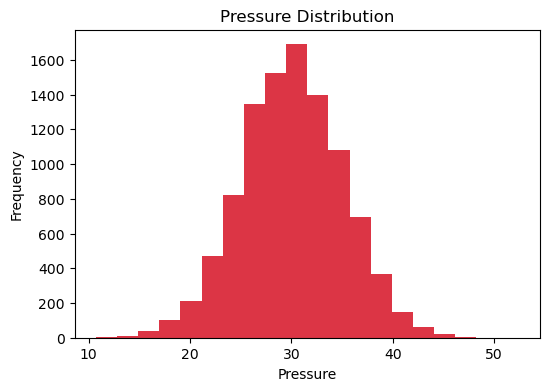

In [28]:
plt.figure(figsize=(6,4))
plt.hist(df['Pressure'], bins=20,color='#dc3545')
plt.title("Pressure Distribution")
plt.xlabel("Pressure")
plt.ylabel("Frequency")
plt.show()


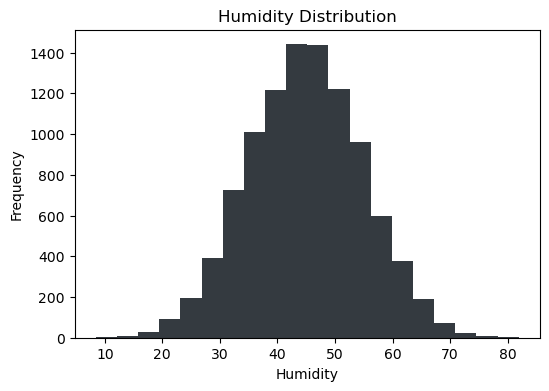

In [29]:
plt.figure(figsize=(6,4))
plt.hist(df['Humidity'], bins=20,color='#343a40')
plt.title("Humidity Distribution")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

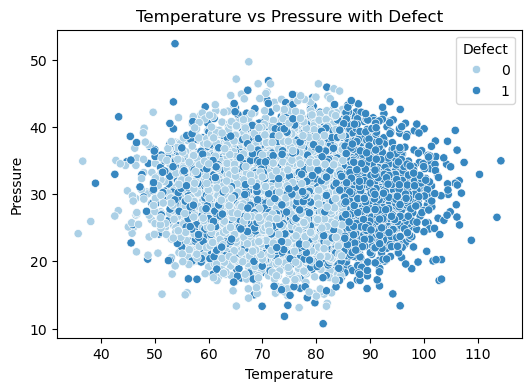

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Pressure', hue='Defect', data=df,palette='Blues')
plt.title("Temperature vs Pressure with Defect")
plt.show()


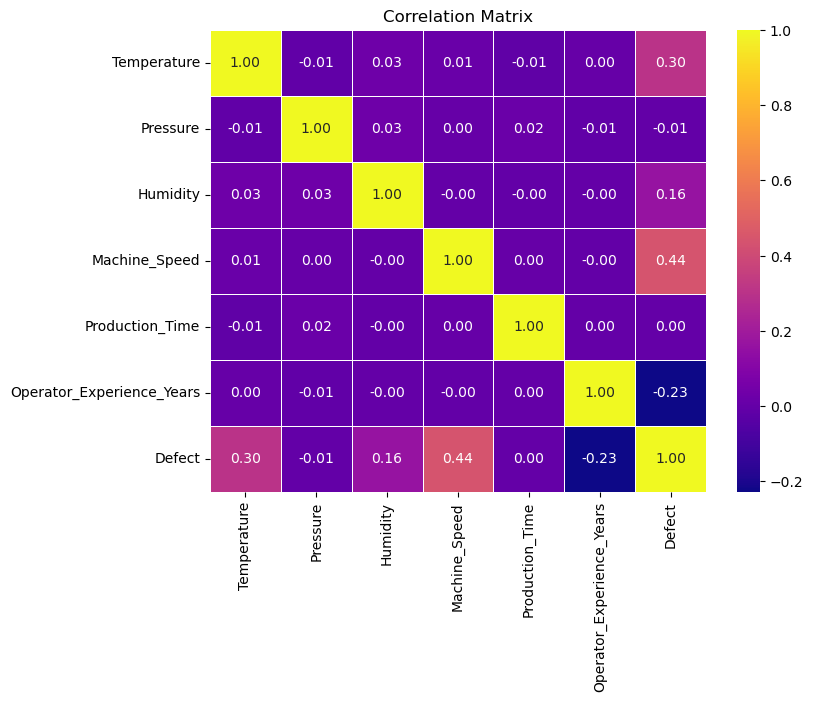

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,fmt=".2f",cmap='plasma',linewidths=0.5,)
plt.title("Correlation Matrix")
plt.show()


<h1>Feature Engineering​</h1>

In [32]:
import pandas as pd
df_encoded=pd.get_dummies(df,drop_first=True)
print(df_encoded.head())

   Temperature  Pressure  Humidity  Machine_Speed  Production_Time  \
0        79.97     26.61     48.48           1297                8   
1        73.62     28.47     47.83           1271                2   
2        81.48     27.01     35.63           1463                3   
3        90.23     30.55     50.80           1107                7   
4        72.66     35.99     30.10           1258               10   

   Operator_Experience_Years  Defect  Shift_Evening  Shift_Night  \
0                          5       0          False        False   
1                          6       0           True        False   
2                          8       1           True        False   
3                          8       1           True        False   
4                          3       0          False        False   

   Material_Type_Plastic  Material_Type_Steel  
0                  False                False  
1                  False                False  
2                   True  

In [33]:
df['Temp_Level'] = pd.cut(
    df['Temperature'],
    bins=[0,50,80,200],
    labels=['Low', 'Normal', 'High']
)
df['Speed_Level'] = pd.cut(
    df['Machine_Speed'],
    bins=[0, 900, 1200, 1600],
    labels=['Slow', 'Medium', 'Fast']
)
print(df[['Temperature', 'Temp_Level', 'Machine_Speed', 'Speed_Level']])
df = pd.get_dummies(df, columns=['Temp_Level', 'Speed_Level'], drop_first=True)
df


      Temperature Temp_Level  Machine_Speed Speed_Level
0           79.97     Normal           1297        Fast
1           73.62     Normal           1271        Fast
2           81.48       High           1463        Fast
3           90.23       High           1107      Medium
4           72.66     Normal           1258        Fast
...           ...        ...            ...         ...
9995        88.01       High           1468        Fast
9996        55.02     Normal           1572        Fast
9997        67.95     Normal           1350        Fast
9998        79.96     Normal           1136      Medium
9999        81.44       High            829        Slow

[10000 rows x 4 columns]


,Temperature,Pressure,Humidity,Machine_Speed,Production_Time,Shift,Operator_Experience_Years,Material_Type,Defect,Temp_Level_Normal,Temp_Level_High,Speed_Level_Medium,Speed_Level_Fast
0,79.97,26.61,48.48,1297,8,Day,5,Aluminum,0,True,False,False,True
1,73.62,28.47,47.83,1271,2,Evening,6,Aluminum,0,True,False,False,True
2,81.48,27.01,35.63,1463,3,Evening,8,Plastic,1,False,True,False,True
3,90.23,30.55,50.80,1107,7,Evening,8,Aluminum,1,False,True,True,False
4,72.66,35.99,30.10,1258,10,Day,3,Steel,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,88.01,31.94,39.23,1468,2,Evening,12,Plastic,1,False,True,False,True
9996,55.02,36.89,59.45,1572,11,Day,13,Aluminum,1,True,False,False,True
9997,67.95,31.89,39.99,1350,4,Evening,9,Aluminum,0,True,False,False,True
9998,79.96,38.57,26.08,1136,10,Evening,4,Aluminum,0,True,False,True,False


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('Defect', axis=1)
y = df['Defect']
X = X.select_dtypes(include=['int64', 'float64'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (7000, 6)
Testing data shape: (3000, 6)


<h1>Model Building</h1>

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)


[[ 0.71750896  0.94952244  1.25062808  0.40890507 -0.31330098 -1.19891475]
 [-1.19223839 -0.35041085  0.03944165 -0.20131643  0.32330478  0.90122786]
 [ 0.20392155 -0.12607722  0.86552769  0.40890507  0.0050019   1.36792622]
 ...
 [-0.70258515 -0.63883981  2.21693536  0.80119032  1.27821343 -1.6656131 ]
 [ 0.19694076 -0.15411892 -0.02863678  0.19968627  0.32330478  1.6012754 ]
 [-1.71879014 -1.21569773 -0.94312317 -0.65026511  1.27821343  0.66787869]]
[[ 2.62526181  0.24447387  1.57781098 -1.25176916 -0.31330098 -1.19891475]
 [-1.03965806 -0.75300961  1.10634244  1.55960847 -0.94990674  0.66787869]
 [-0.35354517  2.44574767  1.74343463 -1.33022621  0.32330478  0.20118033]
 ...
 [-0.53305145  1.14781735 -1.07216736 -1.34330239 -0.94990674  1.36792622]
 [-1.40864318 -0.10204147 -0.44218785  1.01040912  0.64160767 -1.19891475]
 [-0.1341486   1.65056505 -0.39951182  0.83606012 -1.26820962  1.36792622]]


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nLogistic Regression Report:\n", classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.7636666666666667

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1514
           1       0.77      0.75      0.76      1486

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test,rf_pred))
print("\nRandom Forest Report:\n", classification_report(y_test,rf_pred))


Random Forest Accuracy: 1.0

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1514
           1       1.00      1.00      1.00      1486

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



<h1>Model Evaluation</h1>​

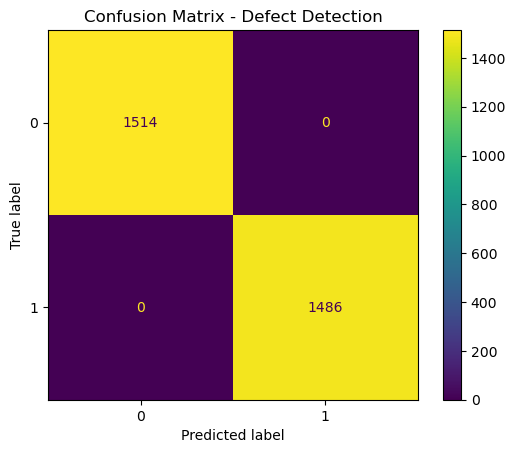

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,rf_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Defect Detection")
plt.show()


In [39]:
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(classification_report(y_test, rf_pred))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1514
           1       1.00      1.00      1.00      1486

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [40]:
import pickle

# ================= SAVE RANDOM FOREST MODEL =================
with open("defect_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# ================= SAVE SCALER =================
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ defect_model.pkl and scaler.pkl saved successfully")


✅ defect_model.pkl and scaler.pkl saved successfully


<h1>Conclusion</h1>

This project successfully showcases my practical understanding of the complete Data Science workflow, from data collection and preprocessing to analysis, modeling, visualization, and insight generation. By working on real-world datasets, I applied Python libraries such as NumPy, Pandas, and Matplotlib, along with Machine Learning techniques, to clean data, perform exploratory analysis, and extract meaningful patterns.

The project also showcases my ability to build and evaluate machine learning models, interpret results, and present findings in a clear and structured manner using visualizations and dashboards. Through this work, I improved my problem-solving skills, logical thinking, and confidence in handling real datasets.

Overall, this project showcases my technical skills, analytical mindset, and readiness to work on real-world data-driven problems, making it a strong addition to my portfolio and a solid foundation for future roles in Data Science, Machine Learning, and Data Analysis.